# Проект по А/B-тестированию

**Постановка задачи**

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.
Оцените корректность проведения теста и проанализируйте его результаты.
Чтобы оценить корректность проведения теста:
удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно;
проверьте равномерность распределения пользователей по тестовым группам и правильность их формирования.

**Техническое задание**

 - Название теста: recommender_system_test;
 
 - Группы: А (контрольная), B (новая платёжная воронка);
 
 - Дата запуска: 2020-12-07;
 
 - Дата остановки набора новых пользователей: 2020-12-21;
 
 - Дата остановки: 2021-01-04;
 
 - Аудитория: 15% новых пользователей из региона EU;
 
 - Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной           системы;
 
 - Ожидаемое количество участников теста: 6000.
 
 - Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой     метрики не менее, чем на 10%:
 

 - конверсии в просмотр карточек товаров — событие `product_page`
 - просмотры корзины — `product_cart`
 - покупки — `purchase`.
 
Загрузите данные теста, проверьте корректность его проведения и проанализируйте полученные результаты.
 

**Данные**

`ab_project_marketing_events.csv`

`final_ab_new_users.csv`

`final_ab_events.csv`

`final_ab_participants.csv`

**`/datasets/ab_project_marketing_events.csv` — календарь маркетинговых событий на 2020 год;
Структура файла:**
  
`name` — название маркетингового события;

`regions` — регионы, в которых будет проводиться рекламная кампания;

`start_dt` — дата начала кампании;

`finish_dt` — дата завершения кампании.


**`/datasets/final_ab_new_users.csv` — все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года;
Структура файла:**

`user_id` — идентификатор пользователя;

`first_date` — дата регистрации;

`region` — регион пользователя;

`device` — устройство, с которого происходила регистрация.



**`/datasets/final_ab_events.csv` — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года;
Структура файла:**

`user_id` — идентификатор пользователя;

`event_dt` — дата и время события;

`event_name` — тип события;

`details` — дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.


**`/datasets/final_ab_participants.csv` — таблица участников тестов.
Структура файла:**

`user_id` — идентификатор пользователя;

`ab_test` — название теста;

`group` — группа пользователя.

**Как выполнить задание**

1.Опишите цели исследования.

2.Исследуйте данные:

  - Требуется ли преобразование типов?
  
 -  Присутствуют ли пропущенные значения и дубликаты? Если да, то какова их природа?
 
3.Оцените корректность проведения теста. Обратите внимание на:

- Соответствие данных требованиям технического задания. Проверьте корректность всех пунктов технического задания.

- Время проведения теста. Убедитесь, что оно не совпадает с маркетинговыми и другими активностями.

- Аудиторию теста. Удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно. Проверьте равномерность распределения пользователей по тестовым группам и правильность их формирования.

4.Проведите исследовательский анализ данных:

- Количество событий на пользователя одинаково распределены в выборках?

- Как число событий в выборках распределено по дням?

- Как меняется конверсия в воронке в выборках на разных этапах?

- Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

5.Проведите оценку результатов A/B-тестирования:

- Что можно сказать про результаты A/B-тестирования?

- Проверьте статистическую разницу долей z-критерием.

6.Опишите выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования. Сделайте общее заключение о корректности проведения теста.

**ЦЕЛЬ ПРОЕКТА:**

Проведение оценки результатов A/B-теста,связанных с внедрением улучшенной рекомендательной системы  новых пользователей из региона EU

In [1]:
import pandas as pd
import numpy as np
import math as mth

import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})

import scipy.stats as stats
from scipy import stats as st

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


import datetime as dt
from datetime import datetime,timedelta

import warnings
warnings.filterwarnings('ignore')

In [2]:
#загрузка данных
try:
    df_mar_events = pd.read_csv('ab_project_marketing_events.csv')
    df_users = pd.read_csv('final_ab_new_users.csv')
    df_events = pd.read_csv('final_ab_events.csv')
    df_part = pd.read_csv('final_ab_participants.csv')
except:
    df_mar_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
    df_users = pd.read_csv('/datasets/final_ab_new_users.csv')
    df_events = pd.read_csv('/datasets/final_ab_events.csv')
    df_part = pd.read_csv('/datasets/final_ab_participants.csv')

In [3]:
def inform(df):
    display(df.head()) # вывод первых 5 строк таблицы
    df.info() # получение информации
    print ('Количество дубликатов -', df.duplicated().sum()) # проверка на дубликаты
    print ('Число пропусков -',df.isna().sum())# число пропусков
    display(df.describe()) #описательные статистики
    return df

## Знакомство с данными, предобработка

### `df_mar_events` — календарь маркетинговых событий на 2020 год

In [4]:
df_mar_events = inform(df_mar_events)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
Количество дубликатов - 0
Число пропусков - name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64


,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,Labor day (May 1st) Ads Campaign,APAC,2020-03-08,2020-02-07
freq,1,4,1,1


Таблица небольшая, посмотрим ее полностью.

In [5]:
df_mar_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Таблица  `df_mar_events`содержит записи о 14 маркетинговых событиях в  4 группах регионов с датами начала и окончания маркетинговой кампании
пропусков нет, дубликатов нет.Названия колонок соответствуют общепризнанному стилю.Однако  даты записаны в формате `object`.Их следует перевести в `datetime`.

In [6]:
df_mar_events['start_dt']=pd.to_datetime(df_mar_events['start_dt'],format='%Y-%m-%d')
df_mar_events['finish_dt']=pd.to_datetime(df_mar_events['finish_dt'],format='%Y-%m-%d')

In [7]:
df_mar_events['finish_dt'].nunique()

14

###`df_users ` — Информация о всех пользователях,  зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года;

In [8]:
df_users = inform(df_users)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB
Количество дубликатов - 0
Число пропусков - user_id       0
first_date    0
region        0
device        0
dtype: int64


,user_id,first_date,region,device
count,61733,61733,61733,61733
unique,61733,17,4,4
top,90A51063E6E0F79D,2020-12-21,EU,Android
freq,1,6290,46270,27520


In [9]:
df_users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

In [10]:
df_users['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

В таблице `df_users` 61773 записи о ID пользователей(прчем все пользователи уникальны),дате регистрации,регионах и устройстве, с которого происходила регистрация.Названия регионов и устройств также уникальны.Пропусков и дубликатов нет.
Дата записана в формате `object`.Также  переведем в `datetime`.

In [11]:
df_users['first_date']=pd.to_datetime(df_users['first_date'],format='%Y-%m-%d')

### **`df_events`** — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года;

In [12]:
df_events = inform(df_events)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB
Количество дубликатов - 0
Число пропусков - user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64


,details
count,62740.000000
mean,23.877631
std,72.180465
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


In [13]:
pd.DataFrame(round(df_events.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
event_dt,0.000000
event_name,0.000000
details,85.800000


Посмотрим на значения столбца событий


In [14]:
df_events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [15]:
df_events['user_id'].nunique()

58703

В таблице `df_events` 440317 записи о ID пользователей,дате и времени событий,типе события ('purchase', 'product_cart', 'product_page','login')и дополнительные данные о событии(Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах).Дубликатов явных нет.Число уникальных пользователей - 58703.это тоже нормально,так как один пользователь может совершить  разные действия в разное время.В столбце `details` пропущено **85.8%** значений.Но это нормально, так как есть события, для которых  нет дополнительной информации.
Дата записана в формате `object`.Также  переведем в `datetime`.



In [16]:
df_events['event_dt'] = pd.to_datetime(df_events['event_dt'])

### **`df_part` — таблица участников тестов.**

In [17]:
df_part = inform(df_part)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB
Количество дубликатов - 0
Число пропусков - user_id    0
group      0
ab_test    0
dtype: int64


,user_id,group,ab_test
count,18268,18268,18268
unique,16666,2,2
top,57442DD4178AFE27,A,interface_eu_test
freq,2,9655,11567


In [18]:
df_part['user_id'].duplicated().sum()

1602

В таблице `df_part` 18268 записи о ID пользователей,названии тестов и группе пользователей.Дубликатов явных нет.Пропусков нет.Пользователи делятся на 2 группы . Есть информация о  двух видах тестов.Тип данных соответствеует природе признаков.Есть пересечения в колонке `user_id`.Видимо есть те,кто попал в одновременно в 2 группы теста или в участвовал в двух видах теста.Проверим это позже.

**ВЫВОД :**
    
  Загружены и изучены 4 таблицы с информацией:
  
   - `df_mar_events`содержит записи о **14** маркетинговых событиях в  **4** регионах с датами начала и окончания маркетинговой       кампании,пропусков нет, дубликатов нет.Названия колонок соответствуют общепризнанному стилю.Однако  даты записаны в             формате `object`.Их перевели в `datetime`.
    
   - `df_users` содержит **61773** записи о ID пользователей(прчем все пользователи уникальны),дате регистрации,регионах и           устройстве, с которого происходила регистрация.Названия регионов и устройств также уникальны.Пропусков и дубликатов нет.       Дата записана в формате `object`.Также перевели в `datetime`.
  
  
  - `df_events` содержит**440317** записи о ID пользователей,дате и времени событий,типе события `('purchase', 'product_cart',      'product_page','login')`и дополнительные данные о событии(Например, для покупок, `purchase`, в этом поле хранится              стоимость покупки в долларах).Дубликатов явных нет.Число уникальных пользователей - **58703**.Это  нормально,так как            один пользователь может совершить разные действия в разное время.В столбце `details` пропущено **85.8%** значений.Но это        нормально, так как есть события, для которых нет дополнительной информации. Дата записана в формате `object`.Также              переведем  в `datetime`.
  
  
  - `df_part`содержит **18268** записи о ID пользователей,названии тестов и группе пользователей.Дубликатов явных нет.Пропусков      нет.Пользователи делятся на 2 группы  . Есть информация о двух видах тестов.Тип данных соответствеует природе          признаков.Есть пересечения в колонке `user_id`.Видимо есть те,кто попал в одновременно в 2 группы теста или в участвовал в      двух видах теста.Проверим это позже.

## Оценка корректности проведения теста

### Соответствие данных требованиям технического задания. Проверьте корректность всех пунктов технического задания

Как упоминалось выше, в таблице `df_part` есть 2 названия тестов.Проверим, присутствует ли такое название.

In [19]:
df_part['ab_test'].value_counts()

interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64

Тест , указанный в ТЗ у нас имеется. И судя по названию  соответствует своему назначению.Но покупатели участвуют еще и в `interface_eu_test` И могут быть те, кто участвовал и в двух тестах одновременно.Объединим `df_part`и  `df_users`

In [20]:
df = df_part.merge(df_users, 
                          how='left', 
                          on='user_id')
df.head()

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC


Посмотрим были ли  те,кто участвовал одновременно в  двух группах

In [21]:
list_2 = df.groupby('user_id').agg({'ab_test': 'nunique'}).reset_index().query('ab_test == 2')['user_id']
len(list_2)

1602

In [22]:
print('Доля участников двух тестов одновременно:{:.2%}'.format(len(list_2)/df['user_id'].nunique()))

Доля участников двух тестов одновременно:9.61%


Оставим только пользователей нужного нам теста и удалим пересечения.Так как мы по ТЗ оцениваем результаты влияния одного теста.И неизвестно как влияют эти два теста вместе.

In [23]:
df = df.query('ab_test == "recommender_system_test" and user_id not in @list_2')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 0 to 6700
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     5099 non-null   object        
 1   group       5099 non-null   object        
 2   ab_test     5099 non-null   object        
 3   first_date  5099 non-null   datetime64[ns]
 4   region      5099 non-null   object        
 5   device      5099 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 278.9+ KB


Осталось, к сожалению не так много пользователей.В дальнейшем их взможно останется еще меньше

In [24]:
df_1 = df.groupby('group')['user_id'].nunique().reset_index()
df_1

,group,user_id
0,A,2903
1,B,2196


Имеется  две группы `А` и `В`.Что соответствует условию ТЗ.Далее будем проверять соответствие другим пкнктам.

In [25]:
fig = px.pie(df_1, values=df_1['user_id'].values,names= df_1['group'],            
title='Распределение по группам')
fig.update_traces(textposition='inside', textinfo='percent+value')

Пользователи двух групп не персекаются между собой

### Проверка условий ТЗ: Дата запуска теста : 2020-12-07;    остановки: 2021-01-04;Дата остановки набора новых пользователей: 2020-12-21;

In [26]:
print('Минимальная дата регистрации пользователей:',df_users['first_date'].min())
print('Максимльная дата регистрации пользователей:',df_users['first_date'].max())

Минимальная дата регистрации пользователей: 2020-12-07 00:00:00
Максимльная дата регистрации пользователей: 2020-12-23 00:00:00


In [27]:
print('Минимальная дата регистрации пользователей:',df['first_date'].min())
print('Максимльная дата регистрации пользователей:',df['first_date'].max())

Минимальная дата регистрации пользователей: 2020-12-07 00:00:00
Максимльная дата регистрации пользователей: 2020-12-21 00:00:00


проверила пользователей в тесте , зарегестрированных не в даты, указанные в ТЗ

In [28]:
list_1 = df_users.query('"2020-12-21" < first_date')['user_id'].unique()
list_1

array(['5815F7ECE74D949F', '32EAEA5E903E3BC1', '9DF7A3C46487EF0B', ...,
       '7E43EB2E03A33E78', 'B8B679DEE9F2CA06', 'BE595EE3E9D59FB9'],
      dtype=object)

In [29]:
df_part.query('ab_test == "recommender_system_test" and user_id  in @list_1')

,user_id,group,ab_test


Здесь дата остановки набора новых пользователей не совпадает с ТЗ. Данные у нас до 23 декабря 2020г.А в ТЗ указана дата 21 декабря 2020.(если мы посмотрим данные в таблице `df_users`).Однако при объдиненении таблиц дата стала корректоной.Видимо были пользователи изначально попашвие в таблицу после даты остановки теста.

In [30]:
print('Дата запуска теста:',df_events['event_dt'].min())
print('Дата остановки теста:',df_events['event_dt'].max())

Дата запуска теста: 2020-12-07 00:00:33
Дата остановки теста: 2020-12-30 23:36:33


В случае с датой остановки теста тоже проблема: По ТЗ тест должен был закончиться 4 января 2021 года.Однако он был остановлен раньше-30 декабря 2020 года.Возможно это связано с новогодними праздниками или может в это время проводились какие либо маркетинговые акции?Посмотрим.А мжет  это опять техническая ошибка?

### Проверка на совпадение с маркетинговыми  активностями.

Заявленые даты проведения теста

In [31]:
min_date = pd.to_datetime('2020-12-07',  format='%Y-%m-%d')
max_date = pd.to_datetime('2021-01-04',  format='%Y-%m-%d')


In [32]:
df_mar_events[df_mar_events['regions'].str.contains("EU")].query('@max_date >= start_dt >= @min_date or @max_date >= finish_dt >= @min_date')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


В Европе проводилась рождественская Новогодняя промо- акция начиная с 25.12.2020 г. Неясно как она повлияла на действия участников нвшего теста.Так что это видимо  ошибка маркетингового отдела: совместить  проведение теста с Промо-акцией.Стоит это иметь ввидуБкак фактор,, влияющий на качество аналтза.

### Проверка аудитории: 15% новых пользователей  должно быть из региона EU

Посмотрим, как распределились новые пользователи по странам

In [33]:
df.groupby('region')['user_id'].nunique().reset_index()

,region,user_id
0,APAC,72
1,CIS,55
2,EU,4749
3,N.America,223


In [34]:
df.query('region != "EU"')['user_id'].nunique()

350

In [35]:
print('Доля  участников теста  не из EU:{:.2%}'.format(df.query('region != "EU"')['user_id'].nunique() / df['user_id'].nunique()))

Доля  участников теста  не из EU:6.86%


In [36]:
print('Аудитория:  новых пользователей из региона EU:{:.2%}'.format(df.query('region == "EU"')['user_id'].nunique() / df_users.query('region == "EU"')['user_id'].nunique()))

Аудитория:  новых пользователей из региона EU:10.26%


Пользователей из Европы,соответствующим условиям теста меньше 15%.Этот пункт также не соответствует ТЗ.Вместе  с пользователями из Европы  в аудиторию теста попало 6.86 % из других регионов.Возможно они заходили с VPN? Не будем пока их трогать ввиду малого количества

### Проверка событий

Добавим таблицу `df_events` к уже ранее объединеннной

In [37]:
df_new = df.merge(df_events, 
                  how='left', 
                  on='user_id')
df_new.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN


Отфильтруем события с лайфтаймом больше, чем горизонт событий (14 дней)Посчитаем для каждого события на какой день оно совершено от момента регистрации и удалим те события, которые свыше 14 дней

In [38]:
df_new['date'] = pd.to_datetime(df_new['event_dt'])
df_new['delta'] = df_new['date'] - df_new['first_date']

h_14 = pd.Timedelta(days=14)

df_new = df_new[df_new['delta'] <= h_14]

df_new.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,date,delta
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99,2020-12-07 14:43:27,0 days 14:43:27
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN,2020-12-07 14:43:29,0 days 14:43:29
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN,2020-12-07 14:43:27,0 days 14:43:27
6,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,login,NaN,2020-12-07 14:43:27,0 days 14:43:27
8,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:06,product_page,NaN,2020-12-20 15:46:06,0 days 15:46:06


In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18154 entries, 0 to 21114
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   user_id     18154 non-null  object         
 1   group       18154 non-null  object         
 2   ab_test     18154 non-null  object         
 3   first_date  18154 non-null  datetime64[ns] 
 4   region      18154 non-null  object         
 5   device      18154 non-null  object         
 6   event_dt    18154 non-null  datetime64[ns] 
 7   event_name  18154 non-null  object         
 8   details     2406 non-null   float64        
 9   date        18154 non-null  datetime64[ns] 
 10  delta       18154 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), float64(1), object(6), timedelta64[ns](1)
memory usage: 1.7+ MB


В итоге у нас вышел объединенный очищеный датафрейм на 1854 строки.Посмотрим на реальное число участников теста после фильтрации данных.

### Проверка условия: Ожидаемое количество участников теста-6000 человек.Равномерность групп.

In [40]:
df_4 = df_new.groupby('group')['user_id'].nunique().reset_index()
df_4

,group,user_id
0,A,2082
1,B,706


In [41]:
fig = px.pie(df_4, values=df_4['user_id'].values,names= df_4['group'],            
title='Распределение по группам')
fig.update_traces(textposition='inside', textinfo='percent+value')

В итоге у нас осталось 2082 пользователя в группе `А`и 706 пользователей в группе `B`.То есть группы непропорциональны.Число пользователей контрольной группы `A`превышает число пользователей тестовой группы `B`в 3 раза!




**ВЫВОД**
 На этапе соответствия данных требованиям ТЗ можнно сделать следующие выводы:

  - Название теста -`recommender_system_test` обозначенное в  ТЗ действительно присутствует и судя по     названию соответствует своему назначению.Однако у нас обнаружено, что в это время проводился           парпллельно другой тест-`interface_eu_test`.1602 пользователя участвовали одновременно в двух         тестах.Доля участников двух тестов одновременно:9.61% в общем объеме данных
    Оставили для дальнейшего рассмотрения только пользователей нужного нам теста и удалили                 пересечения.Так как мы по ТЗ должны оценивать результаты влияния одного теста.И нам неизвестно как     могут повлиять на поведение пользователей эти два теста вместе.

  - Группы: А (контрольная), B (новая платёжная воронка) представленны в данных.Других нет и               пересечений между группами не обнаружено.
  
  - Дата запуска: 2020-12-07 соответствует ТЗ.
  
  - Дата остановки набора новых пользователей в таблице `df_users`не совпадает с ТЗ. Данные у нас до       23 декабря 2020г.Однако при объдиненении таблиц дата стала корректоной.Видимо были пользователи       изначально попавшие в первую таблицу после даты остановки теста.Имела место явная ошибка.
  
  - В случае с датой остановки теста тоже проблема: По ТЗ тест должен был закончиться 4 января 2021       года.Однако он был остановлен раньше-30 декабря 2020 года.Возможно это связано с новогодними           праздниками или может в это время проводились какие либо маркетинговые акции?Может  это опять         техническая ошибка? Такие вещи нежелательны и могут отразиться на результате анализа.
  
  - Выяснено, что в Европе проводилась рождественская Новогодняя промо- акция начиная с 25.12.2020 г.
    Она могла влиять на действия участников нашего теста.Так что это видимо опять ошибка                   маркетингового отдела: совместить проведение теста с Промо-акцией.Стоит это отметить как фактор,       который тоже может влиять  на качество анализа. 
  - Согласно ТЗ аудитория теста должна составлять 15% новых пользователей из региона EU.
    Но пльзователей из Европы,соответствующих условиям теста меньше 15%.- их 10.26% .Этот пункт также     не соответствует ТЗ.Вместе с пользователями из Европы в аудиторию теста попало 6.86 % из других       регионов.Возможно они заходили с VPN? Не будем пока их трогать ввиду малого количества

  - Отфильтрованы и удалены  события с лайфтаймом больше, чем горизонт событий (14 дней)
   
  - Ожидаемое количество участников теста: 6000.Это условие тоже не выполняется.В итоге у нас             осталось всего 2788 пользователей (2082(74.7%) пользователя в группе `А`и 706(25.3%) пользователей     группе `B`).То есть группы непропорциональны.Число пользователей контрольной группы `A`превышает         число   пользователей тестовой группы Bв 3 раза!

Данные оставляют желать лучшего!

## Исследовательский анализ данных

### Количество событий на пользователя одинаково распределены в выборках?

Посмотрим на распределение событий на одного пользователя по выборкам.

In [42]:
df_us = df_new.groupby(['user_id', 'group'])['event_name'].count().reset_index()
df_us.columns=['user_id', 'group','event_sum']
df_us.head()

,user_id,group,event_sum
0,0010A1C096941592,A,12
1,003DF44D7589BBD4,A,15
2,00505E15A9D81546,A,5
3,005E096DBD379BCF,B,4
4,006E3E4E232CE760,A,6


In [43]:
df_us['event_sum'].unique()

array([12, 15,  5,  4,  6,  2,  9,  8,  3,  1, 10,  7, 20, 21, 24, 16, 18,
       14, 11, 13])

In [44]:
df_us.query('group =="A"').mean().round(2)

event_sum    6.89
dtype: float64

In [45]:
df_us.query('group =="B"').mean().round(2)

event_sum    5.4
dtype: float64

На пользователя приходится от 1 до 24 событий.

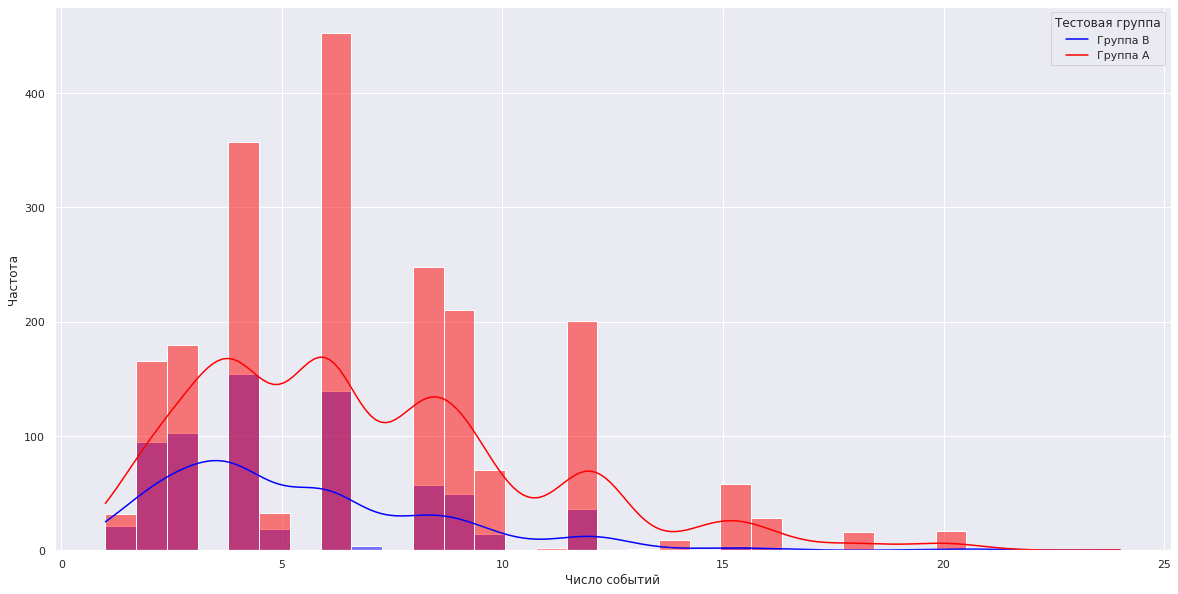

In [46]:
fig = plt.figure(figsize=(20,10))
ax = sns.histplot(x= 'event_sum', hue='group', data=df_us,kde=True,palette=['red','blue'])
ax.set_xlabel('Число событий',)
ax.set_ylabel('Частота')
#ax.set_xlim(0,3000)
ax.legend(title='Тестовая группа', labels=['Группа В', 'Группа А'])
plt.show()

- На пользователя из группы "А" в среднем приходится 6.89 событий
- На пользователя из группы "В" в среднем приходится 5.40 событий
- Распределения схожи
- Чаще совершаеься 4 и 6 событий.




### Как число событий в выборках распределено по дням?

Посмотрим общее распределение

In [47]:

df_new['date'] = df_new['date'].dt.date
df_7 = df_new.pivot_table(index='date', values='event_name', aggfunc='count')
df_7.head()

,event_name
date,
2020-12-07,524
2020-12-08,450
2020-12-09,569
2020-12-10,461
2020-12-11,404


In [48]:
fig = px.bar(df_7, 
             x=df_7.index, 
             y='event_name', 
             text='event_name')

fig.update_layout(title='График распределения количемтва событий по дням',
                   xaxis_title='День',
                   yaxis_title='Количество событий')
fig.show()

А также в разрезе групп.

In [49]:
df_d= df_new.groupby(['group','date']).agg({'event_name':['count']}).reset_index()
df_d.columns=['group','date','event_name']
df_d.head()

,group,date,event_name
0,A,2020-12-07,234
1,A,2020-12-08,267
2,A,2020-12-09,296
3,A,2020-12-10,265
4,A,2020-12-11,282


In [50]:
fig = px.bar(df_d, 
             x='date', 
             y='event_name', 
             text='event_name',                    
             color='group',barmode='group',color_discrete_sequence=[
                 "orange","green"])

fig.update_layout(title='График распределения количества событий по дням в разрезе тестовых групп',
                   xaxis_title='День',
                   yaxis_title='Количество событий')
fig.show()

- Рост числа событий для группы `A`наблюдается с 14 по 21 декабря.потом идет спад.Что ,возможно связано с рождественскими распродажами.

- В группе `B` все равномерно.

- Какого-то преимущества новой рекомендательной системы не обнаружено
.

### Как меняется конверсия в воронке в выборках на разных этапах?

**Соберем таблицу и и визуализируем воронку по пользователям**

In [51]:
df_u = df_new.pivot_table(index='event_name',columns='group',values='user_id', 
aggfunc='nunique').sort_values(by='A', ascending=False).reset_index()
df_u['all'] = df_u['A'] + df_u['B']
df_u['%A'] = (df_u['A']/df_u['A'].shift(1)*100).round(1)
df_u['%B'] = (df_u['B']/df_u['B'].shift(1)*100).round(1)

display(df_u)


group,event_name,A,B,all,%A,%B
0,login,2082,705,2787,NaN,NaN
1,product_page,1360,397,1757,65.3,56.3
2,purchase,652,198,850,47.9,49.9
3,product_cart,631,195,826,96.8,98.5


Тут получилось,что этап `product_cart`(добавление в корзину) стомт в таблице ниже `purchase`(продажи)
Возможно,что кто-то совершал аокупку минуя корзину.Чтобы корректно оторазить все этапы применим функцию reindex() и выставим этапы по порядку.

In [52]:
df_u = df_u.reindex([0, 1, 3, 2]).reset_index()
df_u

group,index,event_name,A,B,all,%A,%B
0,0,login,2082,705,2787,NaN,NaN
1,1,product_page,1360,397,1757,65.3,56.3
2,3,product_cart,631,195,826,96.8,98.5
3,2,purchase,652,198,850,47.9,49.9


In [53]:
fig = go.Figure()
fig.add_trace(go.Funnel(name='Группа А',
                        y=['Вход с логином', 'Просмотр товара','Добавление в корзину','Покупка'],
                        x= df_u['A'],
                        textposition = "inside", textinfo = "value+percent previous",
                        marker = {"color": "#14c257"}))
fig.add_trace(go.Funnel(name='Группа B',
                        y=['Вход с логином', 'Просмотр товара','Добавление в корзину','Покупка'],
                        x= df_u['B'],
                        textposition = "inside", textinfo = "value+percent previous",
                        marker = {"color": "#ce55ad"}))
fig.update_layout(title ='Воронка количества пользователей теста "recommender_system_test" по отфильтрованным данным')
fig.show()

По группе `A`:
   
login(зашло на сайт)- 2082 пользователя 
        
product_page(просмотр товара)- 1360(65%) ...потери 35%

product_cart(корзина)- 631(46%).............потери 54%

purchase(покупка)-652(103%).................потери -3%

По группе `В`:
   
login(зашло на сайт)- 705 пользователя 
        
product_page(просмотр товара)- 597(56%)....потери 44% 
                                                       
product_cart(корзина)- 195(49%)............потери 41% 

purchase(покупка) -198(102%)...............потери -2% 

С первого до последнего этапа воронки доходит около 13% пользователей в обоих случаях 


При просмотре графика видно, что ожидаемого роста конверсии в 10% не наблюдается!
Корзина и покупка поменялись местами.Количество пользователей на этапе корзины и покупок почти одинаково.Видимо на сайте распространена практика "быстрой покупки"
минуя корзину.

Соберем таблицу и и визуализируем воронку по событиям

В случае с событиями картина почти аналогичная.Только здесь уже корзина и покупка местами не мнялись.

### Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

Напрмним вкратце что мы обладаем данными не очень хроршего качества:
    
    -Контрольная и тестовая группы по размеру отличается в 3 раза
    
    -Тест проводился в период предновогоднего ажиотажа
    
    -Тест закончился раньше на  5 дней
    
    -Размер выборки,пригодной для анализа оказался в 2 раза меньше указанной в ТЗ.
    
    -Группа `A` лучшие показатели по воронке,чем группа `B`,хотя ожидалось наоборот
    
    Все вышеназванное способно повлиять на результат A/B теста.
    
    
    
    
    





## Проведение  оценки результатов A/B-тестированияю.Проверка статистической разницы долей z-критерием

**Сформулируем гипотезу:**

**H0** - статистически значимых различий в долях пользователей,совершивших событие для сравниваемых групп нет

**H1** - статистически значимые различия в долях пользователей,совершивших событие для сравниваемых групп есть

Выберем критический уровень значимости - 0.05.В нашем случае этого будет достаточно.


Для проверки гипотез воспользуемся Z-критерием и применим метод Бонферрони (поправка Бонферрони), так как проводим множественное сравнение. коэффициент будет n = 4;



Подготовим данные





**Комментарий** Использован код из тренаженра для написания функции расчета p-Value с использованием Z-критерия.

In [54]:
users = df_new.groupby('group')['user_id'].nunique().reset_index()
users

,group,user_id
0,A,2082
1,B,706


In [55]:
users = users.set_index(users.columns[0])
users

,user_id
group,
A,2082
B,706


In [56]:
df_u

group,index,event_name,A,B,all,%A,%B
0,0,login,2082,705,2787,NaN,NaN
1,1,product_page,1360,397,1757,65.3,56.3
2,3,product_cart,631,195,826,96.8,98.5
3,2,purchase,652,198,850,47.9,49.9


In [57]:
def z_test_result(group1, group2, event, alpha): 
    p1_event = df_u.loc[event, group1]
    p2_event = df_u.loc[event, group2] 
    p1_users = users.loc[group1, 'user_id'] 
    p2_users = users.loc[group2, 'user_id'] 
    p1 = p1_event / p1_users 
    p2 = p2_event / p2_users 
    difference = p1 - p2
    p_combined = (p1_event + p2_event) / (p1_users + p2_users) 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_users + 1 / p2_users))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    bonferroni_alpha = alpha /4
    
    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value:.5f}'.format(group1, group2, event, p_value=p_value))
    if (p_value < bonferroni_alpha):
        print("Отвергаем нулевую гипотезу:между долями есть рзница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу: между долями нет разницы")

In [58]:
for event in df_u.index:
    z_test_result('A', 'B', event, 0.05)
    print()

Проверка для групп A и B, событие: 0, p-значение: 0.08587
Не получилось отвергнуть нулевую гипотезу: между долями нет разницы

Проверка для групп A и B, событие: 1, p-значение: 0.00002
Отвергаем нулевую гипотезу:между долями есть рзница

Проверка для групп A и B, событие: 2, p-значение: 0.17663
Не получилось отвергнуть нулевую гипотезу: между долями нет разницы

Проверка для групп A и B, событие: 3, p-значение: 0.10282
Не получилось отвергнуть нулевую гипотезу: между долями нет разницы



### Что можно сказать про результаты A/B-тестирования?

**ВЫВОД**

По результатам проверки  гипотезы о равенстве долей уникальных пользователей,совершающих события на каждом этапе можно сказать следующее:

У нас есть цепочка событий:**'Вход с логином', 'Просмотр товара','Добавление в корзину', 'Покупка'**

 -Между долями пользователей  побывавших на этапе воронки **Просмотр товара** есть статистически значимая разница.
Доля  потерянных с предыдущего шага **'Вход с логином'** пользователей - **35%**  для группы `А` и **44%** для группы `В`.То есть конверсия на этом шаге у группы `A`выше.

-Нет статистически значимой разницы  в долях уникальных пользователей между группами `А` и `В` при
конверсии в **Добавление в корзину** и в **Покупку**. Это также подтверждает полученную в ходе анализа информацию-значения в воронке на этих этапх близки для обоих групп

-Таким образом A/B тест не показал изменений связанных с внедрением улучшенной рекомендательной системы.Более того, само по себе проведение теста следует считать неэффективным.


## Общие выводы:

**ЦЕЛЬ ПРОЕКТА:**

Проведение оценки результатов A/B-теста,связанных с внедрением улучшенной рекомендательной системы новых пользователей из региона EU

**1.На этапе знакомства с данными и предобработке:**

 Загружены и изучены 4 таблицы с информацией:
  
   - `df_mar_events`содержит записи о **14** маркетинговых событиях в  **4** регионах с датами начала и окончания маркетинговой       кампании,пропусков нет, дубликатов нет.Названия колонок соответствуют общепризнанному стилю.Однако  даты записаны в             формате `object`.Их перевели в `datetime`.
    
   - `df_users` содержит **61773** записи о ID пользователей(прчем все пользователи уникальны),дате регистрации,регионах и           устройстве, с которого происходила регистрация.Названия регионов и устройств также уникальны.Пропусков и дубликатов нет.       Дата записана в формате `object`.Также перевели в `datetime`.
   
  - `df_events` содержит**440317** записи о ID пользователей,дате и времени событий,типе события `('purchase', 'product_cart',      'product_page','login')`и дополнительные данные о событии(Например, для покупок, `purchase`, в этом поле хранится              стоимость покупки в долларах).Дубликатов явных нет.Число уникальных пользователей - **58703**.Это  нормально,так как            один пользователь может совершить разные действия в разное время.В столбце `details` пропущено **85.8%** значений.Но это        нормально, так как есть события, для которых нет дополнительной информации. Дата записана в формате `object`.Также              переведем  в `datetime`.
    
  - `df_part`содержит **18268** записи о ID пользователей,названии тестов и группе пользователей.Дубликатов явных нет.Пропусков      нет.Пользователи делятся на 2 группы  . Есть информация о двух видах тестов.Тип данных соответствеует природе          признаков.Есть пересечения в колонке `user_id`.Видимо есть те,кто попал в одновременно в 2 группы теста или в участвовал в      двух видах теста.Проверим это позже.


 **2.На этапе соответствия данных требованиям ТЗ можнно сделать следующие выводы:**

  - Название теста -`recommender_system_test` обозначенное в  ТЗ действительно присутствует и судя по  названию соответствует своему назначению.Однако у нас обнаружено, что в это время проводился           парпллельно другой тест-`interface_eu_test`.**1602** пользователя участвовали одновременно в двух      тестах.Доля участников двух тестов одновременно:9.61% в общем объеме данных.Оставили для дальнейшего рассмотрения только пользователей нужного нам теста и удалили пересечения.Так как мы по ТЗ должны оценивать результаты влияния одного теста.И нам неизвестно как могут повлиять на поведение пользователей эти два теста вместе.

  - Группы: А (контрольная), B (новая платёжная воронка) представленны в данных.Других нет и           пересечений между группами не обнаружено.
  
  - Дата запуска: 2020-12-07 соответствует ТЗ.
  
  - Дата остановки набора новых пользователей в таблице `df_users`не совпадает с ТЗ. Данные у нас до    23 декабря 2020г.Однако при объдиненении таблиц дата стала корректоной.Видимо были пользователи       изначально попавшие в первую таблицу после даты остановки теста
  

- В случае с датой остановки теста тоже проблема: По ТЗ тест должен был закончиться 4 января 2021      года.Однако он был остановлен раньше-30 декабря 2020 года.Возможно это связано с новогодними           праздниками или может в это время проводились какие либо маркетинговые акции?Может  это опять         техническая ошибка? Такие вещи нежелательны и могут отразиться на результате анализа.
  
 - Выяснено, что в Европе проводилась рождественская Новогодняя промо-акция начиная с 25.12.2020г.Она могла влиять на действия участников нашего теста.Так что это видимо опять ошибка                   маркетингового отдела: совместить проведение теста с Промо-акцией.Стоит это отметить как фактор,       который тоже может влиять  на качество анализа. 
  - Согласно ТЗ аудитория теста должна составлять 15% новых пользователей из региона EU.Но пльзователей из Европы,соответствующих условиям теста меньше 15%.- их 10.26% .Этот пункт также не соответствует ТЗ.Вместе с пользователями из Европы в аудиторию теста попало 6.86 % из других       регионов.Возможно они заходили с VPN? Не удаляли ввиду малого количества.

 - Отфильтрованы и удалены  события с лайфтаймом больше, чем горизонт событий (14 дней)
   
 - Ожидаемое количество участников теста: 6000.Это условие тоже не выполняется.В итоге у нас            осталось всего 2788 пользователей (2082(74.7%) пользователя в группе `А`и 706(25.3%) пользователей     группе `B`).То есть группы непропорциональны.Число пользователей контрольной группы `A`превышает        число   пользователей тестовой группы Bв 3 раза!

**Данные оставляют желать лучшего!**

**3.На этапе исследовательского анализа данных:**

При анализе числа распределения событий на пользователя
- На пользователя из группы "А" в среднем приходится 6.89 событий
- На пользователя из группы "В" в среднем приходится 5.40 событий
- Распределения схожи
- Чаще совершаеься 4 и 6 событий.
- На пользователя приходится от 1 до 24 событий.

При анализе распределения событий по дням

- Рост числа событий для группы `A`наблюдается с 14 по 21 декабря.потом идет спад.Что ,возможно связано с рождественскими распродажами.

- В группе `B` все равномерно.

- Какого-то преимущества новой рекомендательной системы не обнаружено

При анализе воронки по покупателям:

 **По группе `A`:**
   
     login(зашло на сайт)- 2082 пользователя 
        
     product_page(просмотр товара)- 1360(65%) ...потери 35%

     product_cart(корзина)- 631(46%).............потери 54%

     purchase(покупка)-652(103%).................потери -3%

**По группе `В`:**
   
    login(зашло на сайт)- 705 пользователя 
        
    product_page(просмотр товара)- 597(56%)....потери 44% 
                                                       
    product_cart(корзина)- 195(49%)............потери 41% 

    purchase(покупка) -198(102%)...............потери -2% 

С первого до последнего этапа воронки доходит около 13% пользователей в обоих случаях 

При просмотре графика видно, что ожидаемого роста конверсии в 10% не наблюдается!
Корзина и покупка поменялись местами.Количество пользователей на этапе корзины и покупок почти одинаково.Видимо на сайте распространена практика "быстрой покупки"
минуя корзину.


**4.По результатам проверки  гипотезы о равенстве долей уникальных пользователей,совершающих события на каждом этапе можно сказать следующее:**

У нас есть цепочка событий:**'Вход с логином', 'Просмотр товара','Добавление в корзину', 'Покупка'**

  - Между долями пользователей  побывавших на этапе воронки **Просмотр товара** есть статистически значимая разница.
Доля  потерянных с предыдущего шага **'Вход с логином'** пользователей - **35%**  для группы `А` и **44%** для группы `В`.То есть конверсия на этом шаге у группы `A`выше.

- Нет статистически значимой разницы  в долях уникальных пользователей между группами `А` и `В` при
конверсии в **Добавление в корзину** и в **Покупку**. Это также подтверждает полученную в ходе анализа информацию-значения в воронке на этих этапх близки для обоих групп

- Таким образом A/B тест не показал изменений связанных с внедрением улучшенной рекомендательной системы.Более того, само по себе проведение теста следует считать неэффективным.Данные собирались с нарушениями,время теста было выбрано неудачно и преостановлено раньше срока, указанного в ТЗ.Налицо были возможные технические сбои.

**РЕКОМЕНДАЦИИ**

- На будущее стоит тщательно прорабатывать условия подобных тестов.

- Стараться не допускать выгрузки недостоверных данных

- Если существует финансовая возможность и есть  необходимость-повторить тест при болнее благоприятных условиях,в более удачные сроки и при более жестком контроле соблюдения ТЗ. 





